In [131]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt
import plotly.express as px

In [132]:
Telecom_Parte2 = pd.read_json('Archivo_revisado.json')

In [133]:
Telecom_Parte2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   Contract          7267 non-null   int64  
 10  PaperlessBilling  7267 non-null   int64  
 11  PaymentMethod     7267 non-null   object 
 12  Charges.Monthly   7267 non-null   float64
 13  Charges.Total     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   int64  
 16  OnlineBackup      7267 non-null   int64  
 17  

In [134]:
# Verificar valores únicos en Churn (incluyendo cadenas vacías)
print("\nVALORES ÚNICOS EN CHURN:")
print("=" * 50)
churn_counts = Telecom_Parte2['Churn'].value_counts(dropna=False)
print(churn_counts)


VALORES ÚNICOS EN CHURN:
Churn
No     5174
Yes    1869
N/A     224
Name: count, dtype: int64


In [135]:
# Verificar si hay cadenas vacías en Churn
empty_churn = (Telecom_Parte2['Churn'] == '').sum()
print(f"\nCadenas vacías en Churn: {empty_churn}")


Cadenas vacías en Churn: 0


In [136]:
Telecom_Parte2['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [137]:
Telecom_Parte2['Churn']= Telecom_Parte2['Churn'].replace({'No':0,'Yes':1, 'N/A':2})

In [138]:
Telecom_Parte2 = Telecom_Parte2.drop(['customerID','Charges.day', 'Charges.Total'], axis=1)

In [139]:
Telecom_Parte2.head(4)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,Female,0,1,1,9,1,0,2,1,Mailed check,65.6,DSL,0,1,0,1,1,0
1,0,Male,0,0,0,9,1,1,1,0,Mailed check,59.9,DSL,0,0,0,0,0,1
2,1,Male,0,0,0,4,1,0,1,1,Electronic check,73.9,Fiber optic,0,0,1,0,0,0
3,1,Male,1,1,0,13,1,0,1,1,Electronic check,98.0,Fiber optic,0,1,1,0,1,1


In [140]:
Telecom_Parte2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   Contract          7267 non-null   int64  
 9   PaperlessBilling  7267 non-null   int64  
 10  PaymentMethod     7267 non-null   object 
 11  Charges.Monthly   7267 non-null   float64
 12  InternetService   7267 non-null   object 
 13  OnlineSecurity    7267 non-null   int64  
 14  OnlineBackup      7267 non-null   int64  
 15  DeviceProtection  7267 non-null   int64  
 16  TechSupport       7267 non-null   int64  
 17  

In [141]:
import warnings
warnings.filterwarnings('ignore')

In [142]:
Telecom_Parte2['gender'].value_counts()

,count
gender,
Male,3675
Female,3592


In [143]:
Telecom_Parte2['gender']= Telecom_Parte2['gender'].replace({'Male':0,'Female':1})

In [144]:
Telecom_Parte2['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [145]:
Telecom_Parte2['InternetService']= Telecom_Parte2['InternetService'].replace({'Fiber optic':0,'DSL':1,'No':2})

In [146]:
Telecom_Parte2['Contract'].value_counts()

,count
Contract,
1,4005
3,1743
2,1519


In [147]:
Telecom_Parte2['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [148]:
Telecom_Parte2['PaymentMethod']= Telecom_Parte2['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})


In [149]:
Telecom_Parte2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   Contract          7267 non-null   int64  
 9   PaperlessBilling  7267 non-null   int64  
 10  PaymentMethod     7267 non-null   int64  
 11  Charges.Monthly   7267 non-null   float64
 12  InternetService   7267 non-null   int64  
 13  OnlineSecurity    7267 non-null   int64  
 14  OnlineBackup      7267 non-null   int64  
 15  DeviceProtection  7267 non-null   int64  
 16  TechSupport       7267 non-null   int64  
 17  

In [150]:
X = Telecom_Parte2.drop('Churn', axis=1)
y = Telecom_Parte2['Churn']

In [151]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,1,1,9,1,0,2,1,1,65.6,1,0,1,0,1,1,0
1,0,0,0,0,9,1,1,1,0,1,59.9,1,0,0,0,0,0,1


In [152]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   int64  
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   int64  
 3   Dependents        7267 non-null   int64  
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   int64  
 6   MultipleLines     7267 non-null   int64  
 7   Contract          7267 non-null   int64  
 8   PaperlessBilling  7267 non-null   int64  
 9   PaymentMethod     7267 non-null   int64  
 10  Charges.Monthly   7267 non-null   float64
 11  InternetService   7267 non-null   int64  
 12  OnlineSecurity    7267 non-null   int64  
 13  OnlineBackup      7267 non-null   int64  
 14  DeviceProtection  7267 non-null   int64  
 15  TechSupport       7267 non-null   int64  
 16  StreamingTV       7267 non-null   int64  
 17  

In [153]:
y.head(2)

,Churn
0,0
1,0


In [154]:
y.info()


<class 'pandas.core.series.Series'>
Index: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 113.5 KB


In [155]:
Telecom_Parte2['Churn'].value_counts()

,count
Churn,
0,5174
1,1869
2,224


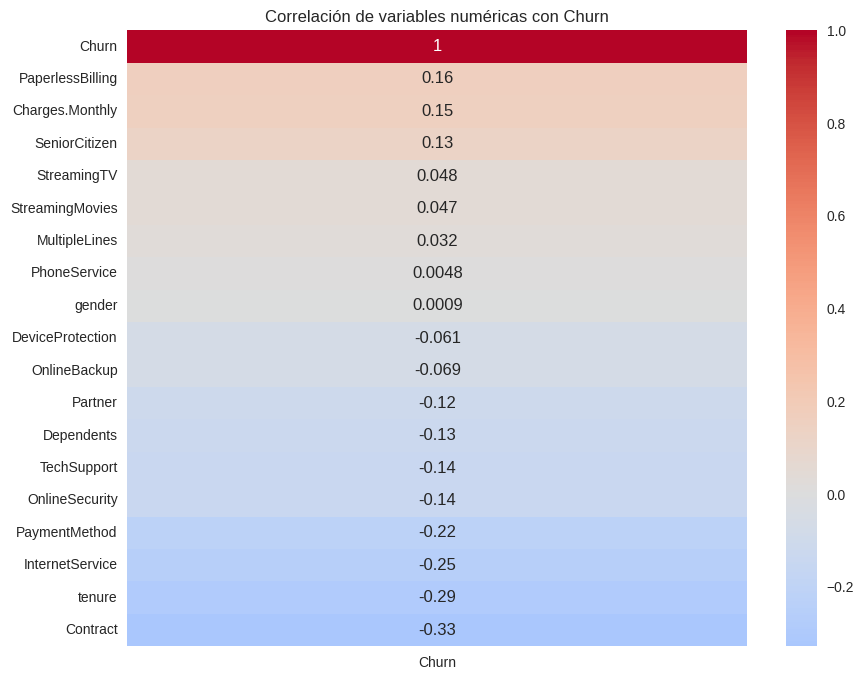

In [156]:
# Seleccionar solo variables numéricas
numericas = Telecom_Parte2.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = numericas.corr()

# Crear un mapa de calor de las correlaciones con Churn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlación de variables numéricas con Churn')
plt.show()

Variables positivamente correlacionadas con Churn (mayor valor → mayor probabilidad de baja):
Variable Correlación Interpretación

Charges.Monthly +0.15 Clientes con facturas mensuales más altas tienden a irse más. Posiblemente porque sienten que el servicio no justifica el precio.

PaperlessBilling +0.16 Quienes reciben facturas electrónicas tienen mayor churn. Esto podría estar asociado a usuarios más jóvenes o digitales, que también suelen cambiar más de proveedor.

SeniorCitizen +0.15 Los adultos mayores tienen una ligera tendencia a cancelar más, aunque la relación no es fuerte. Podría estar relacionado con ingresos fijos o necesidades tecnológicas diferentes.

StreamingTV / Movies +0.062 Usar servicios de streaming no garantiza permanencia. Puede indicar perfiles de usuarios más exigentes o que comparan más.

MultipleLines +0.039 Tener múltiples líneas no asegura lealtad, tal vez por promociones de la competencia.

PhoneService / gender +0.013 Prácticamente neutros, sin impacto real relevante.

En resumen: Los clientes que pagan más, tienen servicios digitales activos y reciben facturación electrónica parecen ser más propensos a irse.

Variables negativamente correlacionadas con Churn (mayor valor → menor probabilidad de baja):
Variable Correlación Interpretación

tenure -0.29 Cuanto más tiempo lleva un cliente, menos probable es que se vaya. La lealtad crece con el tiempo.

Contract -0.33 Contratos a plazo fijo (por ejemplo, anual) reducen mucho el churn. Las ofertas con compromiso parecen efectivas.

InternetService -0.25 Algunas tecnologías (como fibra) pueden estar más asociadas a menor churn por mejor calidad.

PaymentMethod -0.22 Métodos de pago más estables (como débito automático) suelen tener menor churn.


OnlineSecurity / TechSupport -0.14 Tener soporte técnico o seguridad activa parece aumentar la satisfacción.

Partner / Dependents -0.13 Clientes con pareja o familia tienden a ser más estables, posiblemente por razones económicas o estabilidad general.

En resumen: La permanencia, los contratos fijos, servicios de valor agregado y vínculos personales/familiares reducen significativamente el riesgo de cancelación.

In [157]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [158]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)
modelo_lr.score(X_test, y_test)

0.7928505957836847

In [159]:
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7772685609532539

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7607699358386801

In [161]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_model.score(X_test, y_test)

0.7809349220898258

Mejor modelo

El modelo LogisticRegression se considera el modelo con mayor proporción de aciertos sobre el conjunto de prueba(obtuvo el mayor valor de accuracy(exactitud) (0.79) entre todos los modelos evaluados) No se trata de que sea el "mejor modelo posible", sino que en esta prueba concreta, bajo la métrica accuracy, superó a los demás.

¿Es suficiente usar sólo accuracy?No siempre. La accuracy puede ser engañosa. Si el dataset está desbalanceado (por ejemplo, si el 80% de los datos son de una clase y el modelo simplemente predice siempre esa clase). En problemas como Churn (cancelación de clientes), donde suele haber desbalance, es importante mirar también otras métricas.

In [162]:
modelo1 = LogisticRegression()
modelo1.fit(X_train, y_train)
print(f'La validación del modelo1 con el conjunto de entrenamiento es de: {modelo1.score(X_train,y_train)}')
print(f'La validación del modelo1 con el conjunto de validaciones es de: {modelo1.score(X_val, y_val)}')

La validación del modelo1 con el conjunto de entrenamiento es de: 0.7769861830742659
La validación del modelo1 con el conjunto de validaciones es de: 0.7700777202072538


In [163]:
modelo2 = DecisionTreeClassifier(max_depth=10)
modelo2.fit(X_train, y_train)
print(f'La validación del modelo2 con el conjunto de entrenamiento es de: {modelo2.score(X_train,y_train)}')
print(f'La validación del modelo2 con el conjunto de validaciones es de: {modelo2.score(X_val, y_val)}')

La validación del modelo2 con el conjunto de entrenamiento es de: 0.854706390328152
La validación del modelo2 con el conjunto de validaciones es de: 0.7221502590673575


In [164]:
modelo3 = KNeighborsClassifier()
modelo3.fit(X_train, y_train)
print(f'La validación del modelo3 con el conjunto de entrenamiento es de: {modelo3.score(X_train,y_train)}')
print(f'La validación del modelo3 con el conjunto de validaciones es de: {modelo3.score(X_val, y_val)}')

La validación del modelo3 con el conjunto de entrenamiento es de: 0.812607944732297
La validación del modelo3 con el conjunto de validaciones es de: 0.7344559585492227


In [165]:
modelo4 =  SVC(class_weight='balanced')
modelo4.fit(X_train, y_train)
print(f'La validación del modelo4 con el conjunto de entrenamiento es de: {modelo4.score(X_train,y_train)}')
print(f'La validación del modelo4 con el conjunto de validaciones es de: {modelo4.score(X_val, y_val)}')

La validación del modelo4 con el conjunto de entrenamiento es de: 0.6286701208981001
La validación del modelo4 con el conjunto de validaciones es de: 0.6256476683937824


En la validación de modelos, en modelo que tiene mejor performance es el Modelo 1 (Regresión Logística):

Buen rendimiento en validación: 79%.

Casi sin overfitting (aprende patrones generales útiles para predecir casos nuevos)

Muy buen modelo base, simple y confiable.

Está generalizando mejor. ¿Por qué? Porque no se está memorizando todas las salidas

Aquí ya comenzamos a encontrar el camino para poder hacer nuestra validación de los modelos, pero también nos falta evaluarlos.

In [166]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo1.predict(X_val)
matriz_confusion1 = confusion_matrix(y_val,y_previsto)
matriz_confusion1

array([[980, 119,   0],
       [188, 209,   0],
       [ 37,  11,   0]])

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

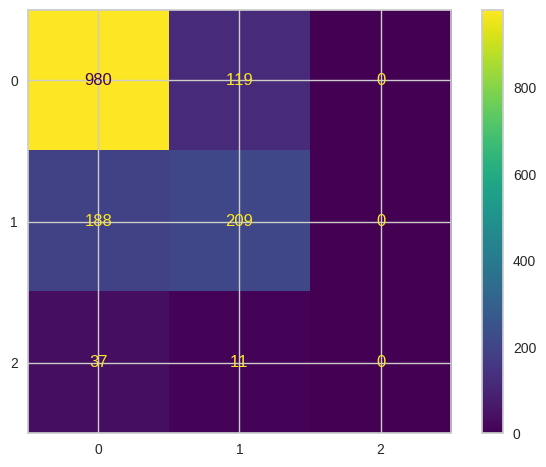

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion1, display_labels=['Retención','Evasión'])
visualizacion.plot();

ValueError: The target y is not binary. Got multiclass type of target.

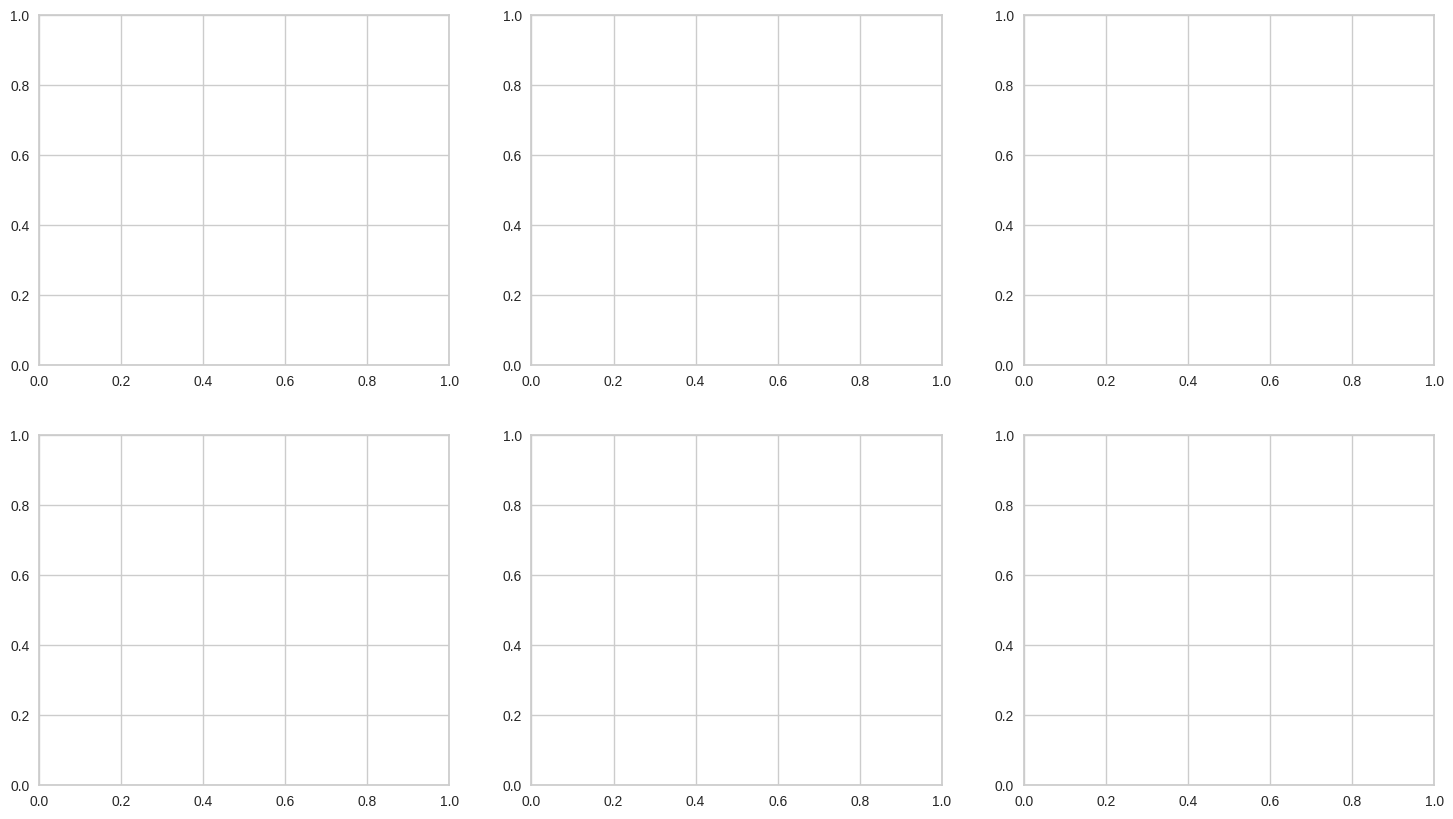

In [169]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Lista de modelos con sus nombres
modelos = [
    ('Regresión Logística', modelo1),
    ('Árbol de Decisión', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
]

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 18 de ancho, 10 de alto
axes = axes.flatten()  # Aplanar matriz de ejes para acceder con índice simple

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"El modelo {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(y_val, probas, ax=ax, name=nombre)

    # Título con AUC
    auc = roc_auc_score(y_val, probas)
    ax.set_title(f"{nombre}\nAUC = {auc:.2f}")
    ax.grid(True)

# Eliminar subplot vacío (el sexto, ya que solo hay 5 modelos)Modelo LogisticRegression
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()